In [16]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

1. Dengan data SeoulBikeData.csv, aplikasikan regresi linier untuk memprediksi berapa
jumlah penyewa sepeda di kota Seoul jika temperature kota berada pada suhu berikut ini:
a. 20 celcius
b. 25 celcius
c. 30 celcius
d. 15 celcius
e. 17 celcius

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
df.shape

(1460, 81)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [11]:
missing = df.isnull().sum()
missing = missing[missing >0]
missing.sort_values(ascending=False,inplace=True)

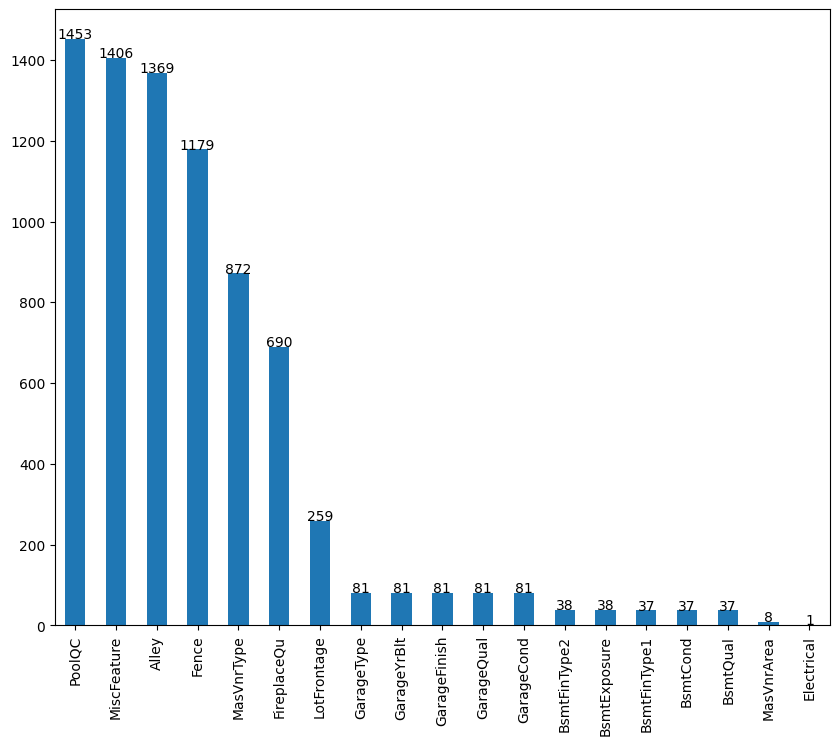

In [14]:
plt.figure(figsize=(10,8))
missing.plot.bar()

#Add data values at the end of each bar
for i, value in enumerate(missing):
    plt.text(i, value+1, str(value),ha='center')
    
plt.show()

<Axes: xlabel='SalePrice', ylabel='Count'>

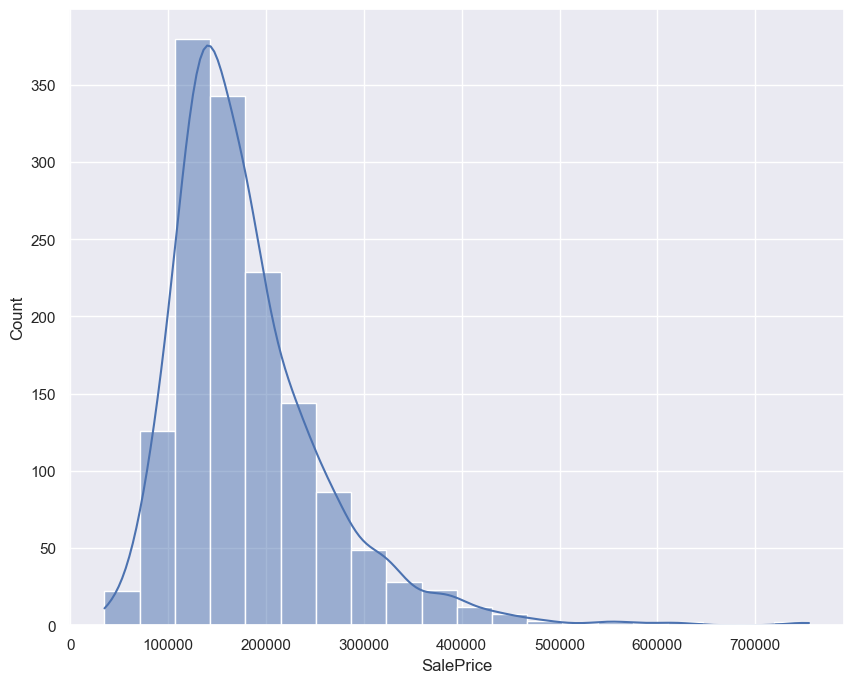

In [17]:
sns.set(rc={'figure.figsize':(10,8)})
sns.histplot(df['SalePrice'], bins=20, kde=True)

In [19]:
# Select only numerical columns
numerical_columns = df.select_dtypes(include=['number'])
numerical_columns.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [21]:
# Select only categorical columns
categorical_columns = df.select_dtypes(include=['object'])
categorical_columns.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [22]:
# Analyze the relationship between SalesPrice and other numerical variables
correlation = numerical_columns.corr()['SalePrice']
print(correlation.sort_values(ascending=False))

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

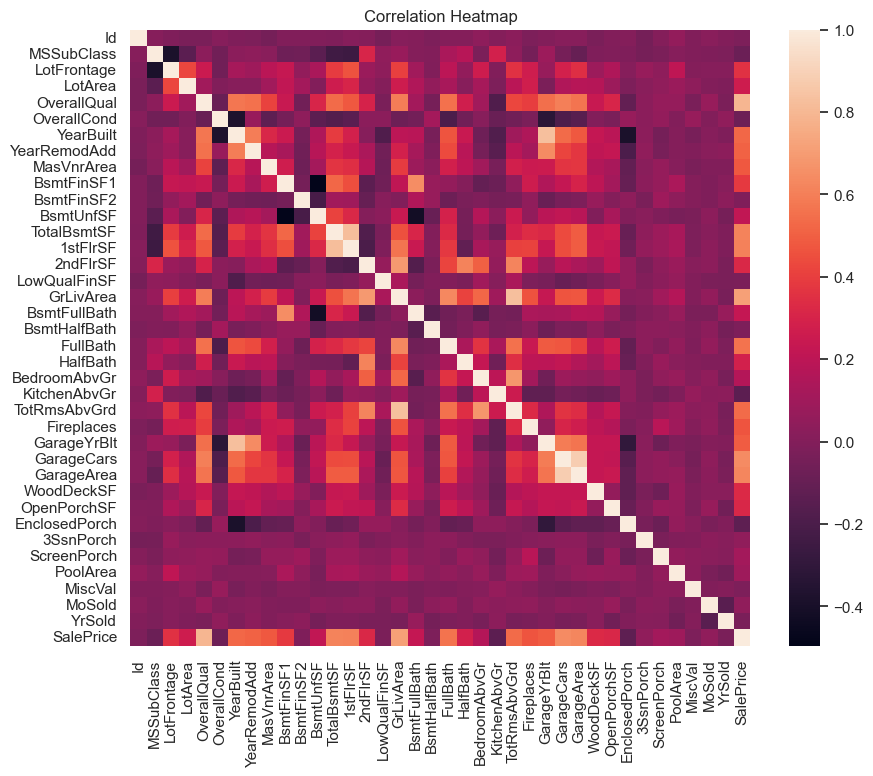

In [23]:
# Create correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(numerical_columns.corr(),annot=False)
plt.title('Correlation Heatmap')
plt.show()

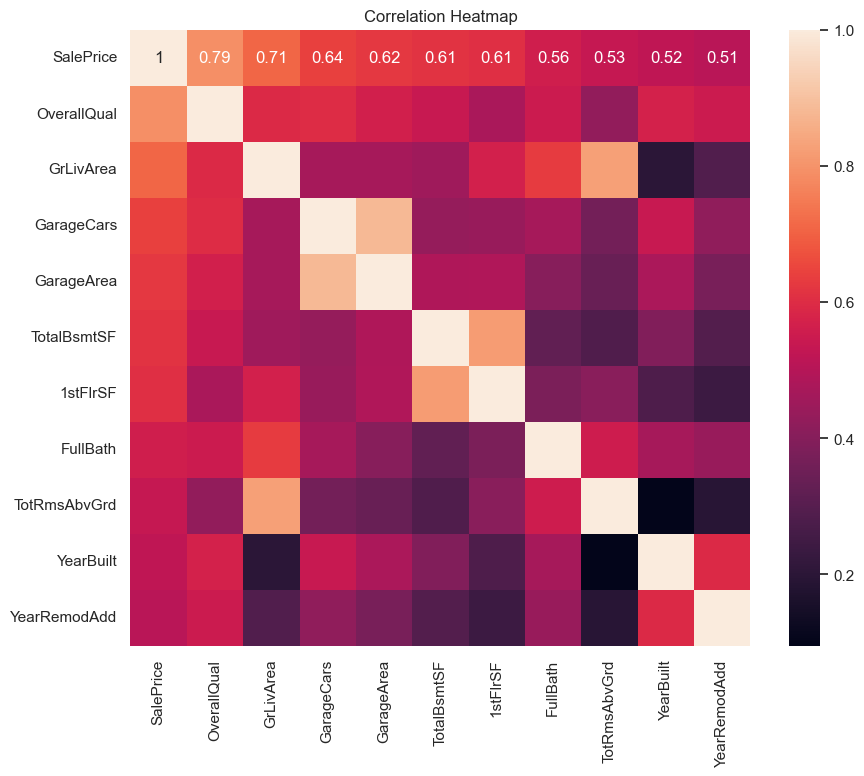

In [24]:
# Get the top 10 highest correlation values with 'SalesPrice'
top_correlation_with_salesprice = numerical_columns.corr()['SalePrice'].nlargest(11)

# Filter numerical_columns to include only top correlations
top_correlation_matrix = numerical_columns.corr().loc[top_correlation_with_salesprice.index, top_correlation_with_salesprice.index]

# Create correlation heatmap with top 10 variables with SalePrice
plt.figure(figsize=(10,8))
sns.heatmap(top_correlation_matrix,annot=True)
plt.title('Correlation Heatmap')
plt.show()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19736\3453550780.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});


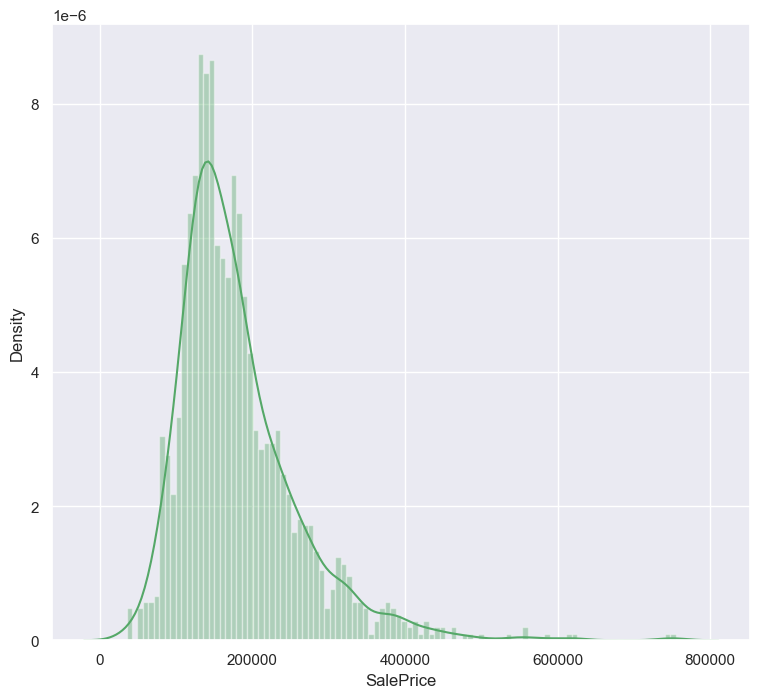

In [27]:
print(df['SalePrice'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [29]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [13]:
import pandas as pd

# Mengimpor data
df = pd.read_csv('SeoulBikeData.csv')

# Mencari baris dengan suhu terdekat dengan -5.2 Celcius
idx = (df['Temperature'] - (-6)).abs().idxmin()

# Menghitung rata-rata jumlah sepeda yang disewa pada suhu terdekat
a = df.loc[idx, 'Rented Bike Count']
print(a)

173


In [18]:
# Mencari baris dengan suhu -5.2 Celcius
rows_with_temp = df[df['Temperature'] == (-5.2)]

# Menghitung total jumlah penyewaan sepeda pada suhu -5.2 Celcius
total_rentals = rows_with_temp['Rented Bike Count'].sum()

# Menampilkan hasil
print(f'Total jumlah penyewaan sepeda pada suhu -5.2 Celcius adalah: {total_rentals}')

Total jumlah penyewaan sepeda pada suhu -5.2 Celcius adalah: 3050


In [26]:
rows_temp = df[df['Temperature'] == (20)].sum()
rows_temp



Date                 30-04-1808-05-1811-05-1814-05-1817-05-1824-05-...
Rented Bike Count                                                29535
Temperature                                                      580.0
Humidity                                                          1941
Wind speed                                                        43.0
Rainfall                                                           2.6
dtype: object

In [27]:
count_temp = df[df['Temperature'] == (20)].count()
count_temp

Date                 29
Rented Bike Count    29
Temperature          29
Humidity             29
Wind speed           29
Rainfall             29
dtype: int64

In [13]:
a = df['Rented Bike Count'][df['Temperature']== (20)].sum()
print((a))

29535


In [28]:
print(len(df[df['Temperature']== (20)]))

29


In [4]:
# ANALISIS REGRESI LINEAR ->MENGHASILKAN RATA2 DARI JUMLAH PERENTAL SEPEDA DARI SUHU YANG DICARI

import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('SeoulBikeData.csv')
df

,Date,Rented Bike Count,Temperature,Humidity,Wind speed,Rainfall
0,01-12-17,254,-5.2,37,2.2,0.0
1,01-12-17,204,-5.5,38,0.8,0.0
2,01-12-17,173,-6.0,39,1.0,0.0
3,01-12-17,107,-6.2,40,0.9,0.0
4,01-12-17,78,-6.0,36,2.3,0.0
...,...,...,...,...,...,...
8755,30-11-18,1003,4.2,34,2.6,0.0
8756,30-11-18,764,3.4,37,2.3,0.0
8757,30-11-18,694,2.6,39,0.3,0.0
8758,30-11-18,712,2.1,41,1.0,0.0


In [7]:
# subset data
X_train = df[['Temperature']].values
y_train = df['Rented Bike Count'].values

modelregresi = LinearRegression()

modelregresi.fit(X_train, y_train)

LinearRegression()

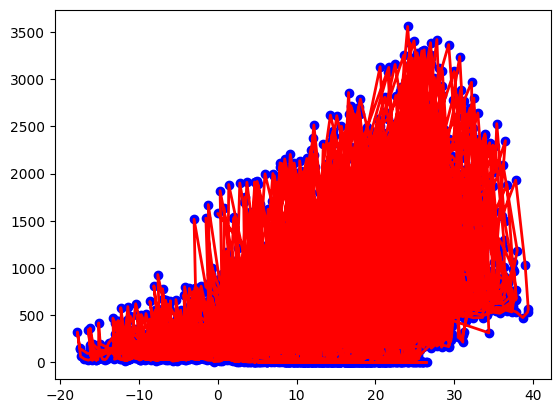

In [9]:
plt.scatter(X_train, y_train, color='b')
plt.plot(X_train, y_train, color='red', linewidth=2, label='Regression Line')

#plt.plot(X, modelregresi.predict(X_train), color='k')

plt.show()

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

# Membaca data dari file CSV
data = pd.read_csv('SeoulBikeData.csv')

# Memilih kolom yang relevan
X = data[['Temperature']]  # Fitur
y = data['Rented Bike Count']  # Target

# Melatih model regresi linier
model = LinearRegression()
model.fit(X_train, y_train)

# Menampilkan koefisien regresi dan intercept
print(f'Koefisien: {model.coef_}')
print(f'Intercept: {model.intercept_}')


Koefisien: [29.07645881]
Intercept: 328.4087186952063


In [18]:
suhu = pd.DataFrame({'Temperature': [20, 25, 30, 15, 17]})

# Membuat prediksi menggunakan model
prediksi_jumlah_penyewa = model.predict(suhu)
prediksi_jumlah_penyewa

array([ 909.93789489, 1055.32018894, 1200.70248299,  764.55560084,
        822.70851846])

Menggunakan library sklearn, kita dapat mengaplikasikan multiple regression dengan
mudah. Beberapa variabel independen dapat menentukan nilai prediksi variabel dependen
jika kita memiliki data yang cukup. Dengan data SeoulBikeData-complete.csv, aplikasikan
regresi linier untuk memprediksi berapa jumlah penyewa sepeda di kota Seoul dengan
ketentuan variabel independen sebagai berikut:

Temperature Humidity WindSpeed Rainfall
25          45       0.8          0
30          90       0.1         0.2
26          50       1           0.4
28          55       0.5          0
20          40       0.7          0

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# Membaca data dari file CSV
df = pd.read_csv('SeoulBikeData-complete.csv')

# Memilih kolom yang relevan sebagai fitur
features = ['Temperature', 'Humidity', 'Wind Speed', 'Rainfall']
X = df[features]
y = df['Rented Bike Count']

# Memisahkan data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Melatih model regresi linier dengan seluruh data
model = LinearRegression()
model.fit(X_train, y_train)

# Data baru untuk prediksi
data_baru = pd.DataFrame({
    'Temperature': [25, 30, 26, 28, 20],
    'Humidity': [45, 90, 50, 55, 40],
    'Wind Speed': [0.8, 0.1, 1, 0.5, 0.7],
    'Rainfall': [0, 0.2, 0.4, 0, 0]
})

# Membuat prediksi menggunakan model
prediksi_jumlah_penyewa = model.predict(data_baru)

# Menampilkan hasil prediksi
for i, pred in enumerate(prediksi_jumlah_penyewa):
    print(f'Prediksi jumlah penyewa sepeda untuk data baru {i+1}: {pred:.2f}')

# Evaluasi model (opsional)
# Prediksi pada set pengujian
y_pred = model.predict(X_test)

# Menghitung MSE dan R^2
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')


In [1]:
def main():
    x = int(input("What's x? "))
    print("x squared is", square(x))


def square(n):
    return n * n


main()

x squared is 4
